In [35]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#x_data = pd.read_csv("mnist_test.csv")
train_data = np.loadtxt("mnist_test.csv", delimiter=",")

In [25]:
train_x_data = train_data[:,1:]
train_t_data = train_data[:,0]

a = train_t_data.astype('int32')
train_t_data_onehot = np.zeros((a.size, a.max()+1))
train_t_data_onehot[np.arange(a.size),a] = 1
train_t_data_onehot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

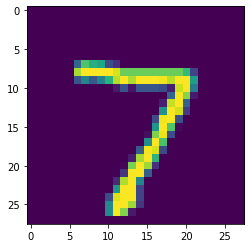

In [38]:
plt.imshow(train_x_data[0].reshape(28,28))

In [39]:
train_t_data_onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [ ]:
x_data = [[0,0],[0,1],[1,0],[1,1]]
t_data = [[0],[1],[1],[0]]
x_data = np.array(x_data)
t_data = np.array(t_data)
#t_data = [0,1,1,0]

In [13]:
W2 = np.random.rand(784,30)
b2 = np.random.rand(30)
W3 = np.random.rand(30,10)
b3 = np.random.rand(10)

In [14]:
def sigmoid(z):
  return 1 / (1+np.exp(-z)) 

def bce(X, target):
  delta = 1e-8
  z2 = np.dot(X,W2)+b2
  a2 = sigmoid(z2)

  z3 = np.dot(a2,W3)+b3
  a3 = sigmoid(z3)

  return -np.sum(target*np.log(a3+delta) + (1-target) * np.log((1-a3)+delta))


In [ ]:
bce(x_data, t_data)

4.952214660143075

In [26]:
# 수치미분 함수
def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = tmp_val - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

In [27]:
#bceF = lambda x: bce(train_x_data, train_t_data_onehot)

In [34]:
learning_rate = 0.1
for idx in range(1000):
  for idx in range(len(train_data)):
    bceF = lambda x: bce(train_x_data[idx], train_t_data_onehot[idx])
    W2_grad = numerical_derivative(bceF, W2)
    b2_grad = numerical_derivative(bceF, b2)
    W3_grad = numerical_derivative(bceF, W3)
    b3_grad = numerical_derivative(bceF, b3)

    W2 = W2 - learning_rate*W2_grad
    b2 = b2 - learning_rate*b2_grad
    W3 = W3 - learning_rate*W3_grad
    b3 = b3 - learning_rate*b3_grad

    loss = bce(train_x_data[idx], train_t_data_onehot[idx])
    print("LOSS: ", loss) #, "W2: ", W2, "W3: ", W3)

LOSS:  43.35814898356554
LOSS:  23.029960570192078
LOSS:  14.643481864047095
LOSS:  7.320442123239748
LOSS:  2.6236563372643698
LOSS:  1.4825373337441163
LOSS:  1.135756239122572
LOSS:  1.5142427544282882
LOSS:  1.4325362215695516
LOSS:  0.940151551693328
LOSS:  1.3988962266551557
LOSS:  1.5480253892383071
LOSS:  0.9605851530492817
LOSS:  1.0068331164185311
LOSS:  1.4722460311196792
LOSS:  1.3306965879110706
LOSS:  1.0499518777056625
LOSS:  1.6870166153535446
LOSS:  1.8096424607757426
LOSS:  1.6496664211009708
LOSS:  1.0494782765252033
LOSS:  1.5440933851356204
LOSS:  0.6665291799381581
LOSS:  1.440253723477405
LOSS:  1.1736014619748003
LOSS:  1.6136452348816386
LOSS:  1.4569704869131472
LOSS:  0.9409970004825777
LOSS:  0.9846634140943789
LOSS:  1.7754348020924802
LOSS:  1.6157524663308929
LOSS:  0.8431118904771893
LOSS:  0.854266390878395
LOSS:  1.2199745532020594
LOSS:  1.3706569524033896
LOSS:  2.2883733162874087
LOSS:  0.7601695146342965
LOSS:  1.202892349954949
LOSS:  1.0283070579

KeyboardInterrupt: ignored

In [ ]:
def predict(X):
  z2 = np.dot(X,W2)+b2
  a2 = sigmoid(z2)

  z3 = np.dot(a2,W3)+b3
  a3 = sigmoid(z3)
  return a3

In [ ]:
predict(np.array([1,1]))